<a href="https://colab.research.google.com/github/kumarshivam99/Language_Translator/blob/main/Sanskrit_translator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import string
from string import digits
import matplotlib.pyplot as plt
%matplotlib inline
import re
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
%tensorflow_version 1.x
import tensorflow as tf
import keras
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers import Dense
from keras.models import Model

TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%cd ../

/


In [ ]:
%ls

bin/                                       etc/    opt/    sys/
boot/                                      home/   proc/   tensorflow-1.15.2/
content/                                   lib/    root/   tmp/
datalab/                                   lib32/  run/    tools/
dev/                                       lib64/  sbin/   usr/
dlib-19.18.0-cp27-cp27mu-linux_x86_64.whl  media/  srv/    var/
dlib-19.18.0-cp36-cp36m-linux_x86_64.whl   mnt/    swift/


In [ ]:
%cd /content/drive/My Drive

/content/drive/My Drive


In [ ]:
df= pd.read_csv('/content/drive/My Drive/sanskrit/processed_data/sanskrit_dataset.csv', names=['eng','sans' ])

In [ ]:
lines=df.copy()
lines

,eng,sans
0,Have seen my pen?,भवती मम लेखनीं दृष्टवती वा?
1,Why?! Haven't you seen it?,किमर्थं?! न दृश्यते वा?
2,Not at all!,सत्यं न दृश्यते एव।
3,"About a five minutes ago, I have seen it just ...",पञ्चनिमिशात् पूर्वं अहम् अत्रैव दृष्टवती खलु।
4,"After I had written, I had kept it on the top ...","आम्, अहं लिखित्वा अत्रैव मम स्यूतस्य उपरि एव स..."
...,...,...
14547,"'O noble lady the lions among men, Rama and La...",मम पृष्ठगतौ तौ च चन्द्रसूर्याविवोदितौ।त्वत्सका...
14548,"'You will see the lionlike Rama, a slayer of e...",अरिघ्नं सिंहसङ्काशं क्षिप्रं द्रक्ष्यसि राघवम्...
14549,'You will hear before long the shouts of gener...,नखदंष्ट्रायुधान् वीरान् सिंहशार्दूलविक्रमान्।व...
14550,"'You will soon see Rama, the slayer of enemies...",निवृत्तवनवासं च त्वया सार्धमरिन्दमम्।अभिषिक्तम...


In [ ]:
lines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14552 entries, 0 to 14551
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   eng     14365 non-null  object
 1   sans    14549 non-null  object
dtypes: object(2)
memory usage: 227.5+ KB


In [ ]:
lines.dropna(inplace=True)

lines=lines.reset_index(drop=True) 



In [ ]:
lines.shape

(14365, 2)

In [ ]:
def text_preprocessing_eng(lines):
  lines=lines.apply(lambda x: x.lower())
  lines=lines.apply(lambda x: re.sub("'", '', x))
  exclude = set(string.punctuation) # Set of all special characters
  lines=lines.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
  remove_digits = str.maketrans('', '', digits)
  lines=lines.apply(lambda x: x.translate(remove_digits))
  lines = lines.apply(lambda x: re.sub("[२३०८१५७९४६।]", "", x))
  lines=lines.apply(lambda x: x.strip())
  lines=lines.apply(lambda x: re.sub(" +", " ", x))
  return lines

In [ ]:
exclude2 = {'!','"','#', '\n','॥॥','','$','%','&',"'",'(',')','*','+',',','-','.','/',';','<','=','>','?','@','[','\\',']','^','_','`','{','|', '}', '~'}

In [ ]:
def text_preprocessing_sans(lines):
  lines=lines.apply(lambda x: x.lower())
  lines=lines.apply(lambda x: re.sub("'", '', x))
  #exclude = set(string.punctuation) # Set of all special characters
  lines=lines.apply(lambda x: ''.join(ch for ch in x if ch not in exclude2))
  remove_digits = str.maketrans('', '', digits)
  lines=lines.apply(lambda x: x.translate(remove_digits))
  lines = lines.apply(lambda x: re.sub("[२३०८१५७९४६।]", "", x))
  lines=lines.apply(lambda x: x.strip())
  lines=lines.apply(lambda x: re.sub(" +", " ", x))
  return lines

In [ ]:
lines.eng=text_preprocessing_eng(lines.eng.astype(str))
lines.sans=text_preprocessing_sans(lines.sans.astype(str))

lines

,eng,sans
0,have seen my pen,भवती मम लेखनीं दृष्टवती वा
1,why havent you seen it,किमर्थं न दृश्यते वा
2,not at all,सत्यं न दृश्यते एव
3,about a five minutes ago i have seen it just here,पञ्चनिमिशात् पूर्वं अहम् अत्रैव दृष्टवती खलु
4,after i had written i had kept it on the top o...,आम् अहं लिखित्वा अत्रैव मम स्यूतस्य उपरि एव स्...
...,...,...
14360,o noble lady the lions among men rama and laks...,मम पृष्ठगतौ तौ च चन्द्रसूर्याविवोदितौत्वत्सकाश...
14361,you will see the lionlike rama a slayer of ene...,अरिघ्नं सिंहसङ्काशं क्षिप्रं द्रक्ष्यसि राघवम्...
14362,you will hear before long the shouts of genera...,नखदंष्ट्रायुधान् वीरान् सिंहशार्दूलविक्रमान्वा...
14363,you will soon see rama the slayer of enemies c...,निवृत्तवनवासं च त्वया सार्धमरिन्दमम्अभिषिक्तमय...


In [ ]:
lines.iloc[2319,1]

'बहवो दुर्लभाश्चैव ये त्वया कीर्तिता गुणा: मुने वक्ष्याम्यहं बुद्ध्वा तैर्युक्तश्श्रूयतान्नर:'

In [ ]:
lines.iloc[11216,0]

'o subduer of enemies speak in this way lakshmana the dear younger brother of rama has come to you and waits for your presence at the entrance burning in grief of his elder brother well if you like to hear his words do as you please return swiftly after saying so'

In [ ]:
len_list_sans=[]
for l in lines.sans:
    len_list_sans.append(len(l.split(' ')))
max_length_scr = np.max(len_list_sans)
max_length_scr

56

In [ ]:
#word English
all_eng_words=set()
for eng in lines.eng:
    for word in eng.split():
        if word not in all_eng_words:
            all_eng_words.add(word)

input_words = sorted(list(all_eng_words))            

In [ ]:
input_word=pd.DataFrame(input_words)
input_word

,0
0,a
1,aback
2,abandon
3,abandoned
4,abandoning
...,...
16857,“om”
16858,“prosper
16859,“sat”
16860,“tat”


In [ ]:
input_word.to_csv('input_word.csv', header=False, index=False, sep=',', mode='a')

In [ ]:
from google.colab import files
files.download('input_word.csv') 

In [ ]:
len_list_eng=[]
for l in lines.eng:
    len_list_eng.append(len(l.split(' ')))
max_length_tar = np.max(len_list_eng)
max_length_tar

227

In [ ]:
l=lines
l["sans_len"]=len_list_sans
l["eng_len"]=len_list_eng
l

,eng,sans,sans_len,eng_len
0,have seen my pen,भवती मम लेखनीं दृष्टवती वा,5,4
1,why havent you seen it,किमर्थं न दृश्यते वा,4,5
2,not at all,सत्यं न दृश्यते एव,4,3
3,about a five minutes ago i have seen it just here,पञ्चनिमिशात् पूर्वं अहम् अत्रैव दृष्टवती खलु,6,11
4,after i had written i had kept it on the top o...,आम् अहं लिखित्वा अत्रैव मम स्यूतस्य उपरि एव स्...,9,13
...,...,...,...,...
14360,o noble lady the lions among men rama and laks...,मम पृष्ठगतौ तौ च चन्द्रसूर्याविवोदितौत्वत्सकाश...,7,23
14361,you will see the lionlike rama a slayer of ene...,अरिघ्नं सिंहसङ्काशं क्षिप्रं द्रक्ष्यसि राघवम्...,8,24
14362,you will hear before long the shouts of genera...,नखदंष्ट्रायुधान् वीरान् सिंहशार्दूलविक्रमान्वा...,9,27
14363,you will soon see rama the slayer of enemies c...,निवृत्तवनवासं च त्वया सार्धमरिन्दमम्अभिषिक्तमय...,7,26


In [ ]:
l['sans_len'].mean()
print("\n")
l['eng_len'].mean()

8.335120083536372

25.380717020536025

In [ ]:
lines["dif"]=lines['eng_len']/lines['sans_len']
lines["dif2"]=lines['sans_len']/lines['eng_len']
lines

,eng,sans,sans_len,eng_len,dif,dif2
0,have seen my pen,भवती मम लेखनीं दृष्टवती वा,5,4,0.800000,1.250000
1,why havent you seen it,किमर्थं न दृश्यते वा,4,5,1.250000,0.800000
2,not at all,सत्यं न दृश्यते एव,4,3,0.750000,1.333333
3,about a five minutes ago i have seen it just here,पञ्चनिमिशात् पूर्वं अहम् अत्रैव दृष्टवती खलु,6,11,1.833333,0.545455
4,after i had written i had kept it on the top o...,आम् अहं लिखित्वा अत्रैव मम स्यूतस्य उपरि एव स्...,9,13,1.444444,0.692308
...,...,...,...,...,...,...
14360,o noble lady the lions among men rama and laks...,मम पृष्ठगतौ तौ च चन्द्रसूर्याविवोदितौत्वत्सकाश...,7,23,3.285714,0.304348
14361,you will see the lionlike rama a slayer of ene...,अरिघ्नं सिंहसङ्काशं क्षिप्रं द्रक्ष्यसि राघवम्...,8,24,3.000000,0.333333
14362,you will hear before long the shouts of genera...,नखदंष्ट्रायुधान् वीरान् सिंहशार्दूलविक्रमान्वा...,9,27,3.000000,0.333333
14363,you will soon see rama the slayer of enemies c...,निवृत्तवनवासं च त्वया सार्धमरिन्दमम्अभिषिक्तमय...,7,26,3.714286,0.269231


In [ ]:
lines['dif'].mean()
print('\n')
lines['dif2'].mean()

3.1856015686850436

0.3817713043146609

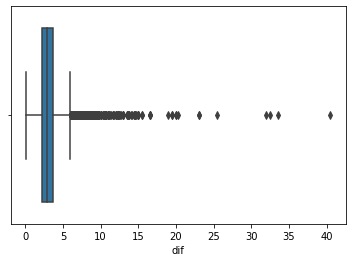

In [ ]:
import seaborn as sns
ax = sns.boxplot(x=lines["dif"])

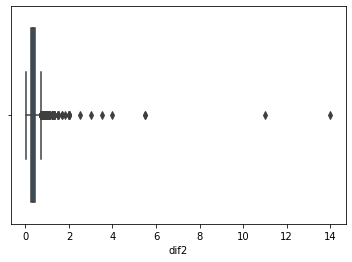

In [ ]:
ax2 = sns.boxplot(x=lines["dif2"])

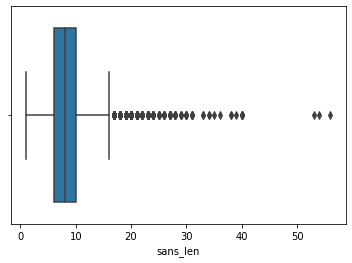

In [ ]:
ax2 = sns.boxplot(x=lines["sans_len"])

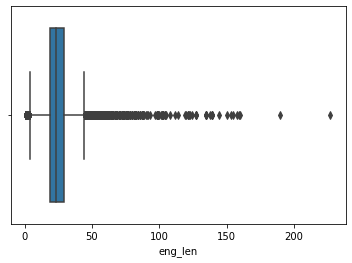

In [ ]:
ax2 = sns.boxplot(x=lines["eng_len"])

In [ ]:
j=-1
for i in lines.dif :
  j+=1
  if(i>2.8):
    lines=lines.drop(j,axis=0)

lines=lines.reset_index(drop=True) 

j=-1
for i in lines.dif2 :
  j+=1
  if(i>0.8):
    lines=lines.drop(j,axis=0)

lines=lines.reset_index(drop=True) 

j=-1
for i in lines.sans_len :
  j+=1
  if(i>16):
    lines=lines.drop(j,axis=0)
  
lines=lines.reset_index(drop=True)

j=-1
for i in lines.eng_len :
  j+=1
  if(i>27):
    lines=lines.drop(j,axis=0)
  elif(i<5):
    lines=lines.drop(j,axis=0) 

lines=lines.reset_index(drop=True) 
lines

,eng,sans,sans_len,eng_len,dif,dif2
0,why havent you seen it,किमर्थं न दृश्यते वा,4,5,1.250000,0.800000
1,about a five minutes ago i have seen it just here,पञ्चनिमिशात् पूर्वं अहम् अत्रैव दृष्टवती खलु,6,11,1.833333,0.545455
2,after i had written i had kept it on the top o...,आम् अहं लिखित्वा अत्रैव मम स्यूतस्य उपरि एव स्...,9,13,1.444444,0.692308
3,but now that it can not be seen at all,परन्तु इदानीं न दृश्यते एव,5,10,2.000000,0.500000
4,i have asked my younger brother too,अहं मम अनुजम् अपि पृष्टवती,5,7,1.400000,0.714286
...,...,...,...,...,...,...
5425,tell valiant rama not to take me back the way ...,यथाऽहं तस्य वीरस्य वनादुपधिना हृतारक्षसा तद्भय...,9,22,2.444444,0.409091
5426,hearing the meaningful courteous and reasonabl...,तदर्थोपहितं वाक्यं प्रश्रितं हेतुसंहितम्निशम्य...,7,11,1.571429,0.636364
5427,mighty powerful and tough monkeys who have the...,तस्य विक्रमसम्पन्नास्सत्त्ववन्तो महाबलाःमन स्स...,7,17,2.428571,0.411765
5428,there are monkeys who are more powerful than m...,मद्विशिष्टाश्च तुल्याश्च सन्ति तत्र वनौकसःमत्त...,8,21,2.625000,0.380952


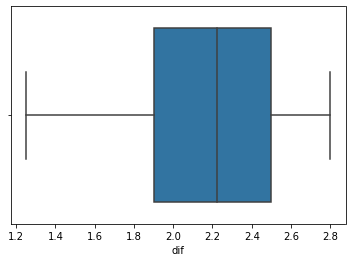

In [ ]:
ax = sns.boxplot(x=lines["dif"])

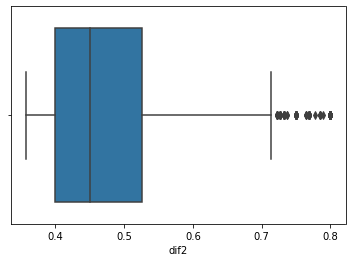

In [ ]:
ax2 = sns.boxplot(x=lines["dif2"])

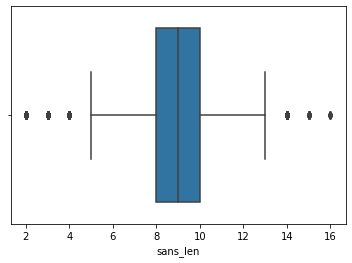

In [ ]:
ax2 = sns.boxplot(x=lines["sans_len"])

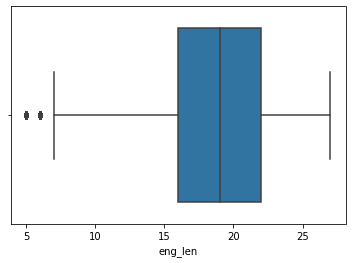

In [ ]:
ax2 = sns.boxplot(x=lines["eng_len"])

In [ ]:
lines['dif'].mean()
print('\n')
lines['dif2'].mean()

2.178582688030208

0.4765025711797855

In [ ]:
lines=lines.drop(['sans_len','eng_len','dif','dif2'],axis=1)

In [ ]:
lines.sans = lines.sans.apply(lambda x : 'START_ '+ x + ' _END')

In [ ]:
lines.sample(10)

,eng,sans
2881,hearing those words an ascetic old in age and ...,START_ अथर्षिर्जरया वृद्धस्तपसा च जरां गतःवेपम...
944,o lion among kings receive this payasam prepar...,START_ इदं तु नृपशार्दूल पायसं देवनिर्मितम्प्र...
7,i found my pen my father told that he had take...,START_ मम लेखनी लब्धामम पिता दूरभाषायाः संख्या...
3188,with lakshmana and sita inside the cave rama h...,START_ तस्मिन्प्रविष्टे तु गुहां लक्ष्मणे सह स...
5080,o hanuman the great communicate my welfare to ...,START_ कुशलं हनुमन्ब्रूयाः सहितौ रामलक्ष्मणौसु...
4798,you are a a jewel among women you should not r...,START_ स्त्रीरत्नमसि मैवं भूः कुरु गात्रेषु भू...
1979,the mightyarmed king lost consciousness for a ...,START_ स मुहूर्तमिवासंज्ञो दुःखितश्च महीपतिःवि...
2664,all of you carefully watch here do not proceed...,START_ यत्ता भवन्तस्तिष्ठन्तु नेतो गन्तव्यमग्र...
728,the rudras adityas vasus sadhyas vishvadevas a...,START_ रुद्रादित्या वसवो ये च साध्या विश्वेऽश्...
4753,this ashoka grove filled with many trees guard...,START_ ध्रुवं तु रक्षोबहुला भविष्यति वनाकुलाअश...


In [ ]:
#word English
all_eng_words=set()
for eng in lines.eng:
    for word in eng.split():
        if word not in all_eng_words:
            all_eng_words.add(word)

#word hindi 
all_sans_words=set()
for sans in lines.sans:
    for word in sans.split():
        if word not in all_sans_words:
            all_sans_words.add(word)

In [ ]:
# Max Length
lenght_list_eng=[]
for l in lines.eng:
    lenght_list_eng.append(len(l.split(' ')))
max_length_src = np.max(lenght_list_eng)
max_length_src

27

In [ ]:
# Max Length
lenght_list_sans=[]
for l in lines.sans:
    lenght_list_sans.append(len(l.split(' ')))
max_length_tar = np.max(lenght_list_sans)
max_length_tar

18

In [ ]:
lines.shape

(5430, 2)

In [ ]:
input_words = sorted(list(all_eng_words))
target_words = sorted(list(all_sans_words))
num_encoder_tokens = len(all_eng_words)
num_decoder_tokens = len(all_sans_words)
num_encoder_tokens, num_decoder_tokens

(8378, 22873)

In [ ]:
num_decoder_tokens += 1
num_encoder_tokens += 1
# For zero padding

In [ ]:
input_token_index = dict([(word, i+1) for i, word in enumerate(input_words)])
target_token_index = dict([(word, i+1) for i, word in enumerate(target_words)])

In [ ]:
reverse_input_char_index = dict((i, word) for word, i in input_token_index.items())
reverse_target_char_index = dict((i, word) for word, i in target_token_index.items())

In [ ]:
lines = shuffle(lines)
lines.head(10)

,eng,sans
4253,indeed i have not uttered any harsh word or do...,START_ न मे दुर्व्याहृतं किञ्चिन्नापि मे दुरनु...
2078,o lakshmana this happens to be the first night...,START_ इयमद्य निशा पूर्वा सौमित्रे प्रहिता वनम...
4789,ponds covered with a variety of beautiful flow...,START_ वृतां पुष्करिणीभिश्च नानापुष्पोपशोभिताम...
1771,the duty which you are carrying out with coura...,START_ यं पालयसि धर्मं त्वं धृत्या च नियमेन चस...
2818,both his wives became pregnant it is said that...,START_ द्वे चास्य भार्ये गर्भिण्यौ बभूवतुरिति ...
5048,it will be proper if rama comes here kills rav...,START_ यदि रामो दशग्रीवमिह हत्त्वा सबान्धवम्मा...
2192,after the arrival of bharata i hope queen kaik...,START_ सा हि देवी महाराजं कैकेयी राज्यकारणात्अ...
3179,similarly dusana proceeded with four mahakapal...,START_ महाकपालिस्स्थूलाक्षः प्रमाथी त्रिशिरास्...
3146,how can you face us alone we outnumber you lea...,START_ का हि ते शक्तिरेकस्य बहूनां रणमूर्धनीअस...
3478,the lady you want to abduct from here is the f...,START_ तस्यैषा लोकनाथस्य धर्मपत्नी यशस्विनीसीत...


In [ ]:
# Train - Test Split
X, y = lines.eng, lines.sans
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
X_train.shape, X_test.shape

((4887,), (543,))

In [ ]:
def generate_batch(X = X_train, y = y_train, batch_size = 128):
    ''' Generate a batch of data '''
    while True:
        for j in range(0, len(X), batch_size):
            encoder_input_data = np.zeros((batch_size, max_length_src),dtype='float32')
            decoder_input_data = np.zeros((batch_size, max_length_tar),dtype='float32')
            decoder_target_data = np.zeros((batch_size, max_length_tar, num_decoder_tokens),dtype='float32')
            for i, (input_text, target_text) in enumerate(zip(X[j:j+batch_size], y[j:j+batch_size])):
                for t, word in enumerate(input_text.split()):
                    encoder_input_data[i, t] = input_token_index[word] # encoder input seq
                for t, word in enumerate(target_text.split()):
                    if t<len(target_text.split())-1:
                        decoder_input_data[i, t] = target_token_index[word] # decoder input seq
                    if t>0:
                        # decoder target sequence (one hot encoded)
                        # does not include the START_ token
                        # Offset by one timestep
                        decoder_target_data[i, t - 1, target_token_index[word]] = 1.
            yield([encoder_input_data, decoder_input_data], decoder_target_data)

In [ ]:
latent_dim = 50

In [ ]:
# Encoder
encoder_inputs = Input(shape=(None,))
enc_emb =  Embedding(num_encoder_tokens, latent_dim, mask_zero = True)(encoder_inputs)
encoder_lstm = LSTM(latent_dim,dropout=0.2, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)

# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

In [ ]:
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(num_decoder_tokens,latent_dim, mask_zero = True)
dec_emb = dec_emb_layer(decoder_inputs)

# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True,dropout=0.2, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=encoder_states)

# Use a softmax to generate a probability distribution over the target vocabulary for each time step
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, None, 50)     418950      input_5[0][0]                    
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, None, 50)     1143700     input_6[0][0]                    
____________________________________________________________________________________________

In [ ]:
train_samples = len(X_train)
val_samples = len(X_test)
batch_size = 128
epochs = 20

In [ ]:
history=model.fit_generator(generator = generate_batch(X_train, y_train, batch_size = batch_size),
                    steps_per_epoch = train_samples//batch_size,
                    epochs=epochs,
                    validation_data = generate_batch(X_test, y_test, batch_size = batch_size),
                    validation_steps = val_samples//batch_size)

Epoch 1/20
38/38 [==============================] - 10s 270ms/step - loss: 1.5062 - acc: 0.5880 - val_loss: 2.0918 - val_acc: 0.4105
Epoch 2/20
38/38 [==============================] - 10s 258ms/step - loss: 1.4600 - acc: 0.5931 - val_loss: 2.0715 - val_acc: 0.3936
Epoch 3/20
38/38 [==============================] - 10s 256ms/step - loss: 1.4425 - acc: 0.5967 - val_loss: 2.2509 - val_acc: 0.3670
Epoch 4/20
38/38 [==============================] - 10s 261ms/step - loss: 1.4323 - acc: 0.5999 - val_loss: 2.1909 - val_acc: 0.3573
Epoch 5/20
38/38 [==============================] - 10s 259ms/step - loss: 1.4210 - acc: 0.6015 - val_loss: 0.5330 - val_acc: 0.3456
Epoch 6/20
38/38 [==============================] - 10s 258ms/step - loss: 1.4057 - acc: 0.6072 - val_loss: 2.4677 - val_acc: 0.3432
Epoch 7/20
38/38 [==============================] - 10s 256ms/step - loss: 1.3873 - acc: 0.6106 - val_loss: 2.4043 - val_acc: 0.3435
Epoch 8/20
38/38 [==============================] - 10s 258ms/step - 

In [ ]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


Text(0.5, 1.0, 'model accuracy')

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'epoch')

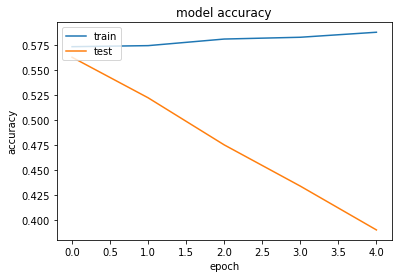

Text(0.5, 1.0, 'model loss')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

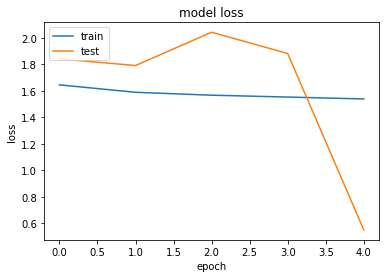

In [ ]:

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save_weights('sans_weights.h5')

In [ ]:
model.load_weights('sans_weights.h5')

In [ ]:
# Encode the input sequence to get the "thought vectors"
encoder_model = Model(encoder_inputs, encoder_states)

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

dec_emb2= dec_emb_layer(decoder_inputs) # Get the embeddings of the decoder sequence

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = decoder_dense(decoder_outputs2) # A dense softmax layer to generate prob dist. over the target vocabulary

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs2] + decoder_states2)

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0] = target_token_index['START_']

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += ' '+sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '_END' or
           len(decoded_sentence) > 50):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update states
        states_value = [h, c]

    return decoded_sentence

In [ ]:
from math import log

In [ ]:
def decode_beem_sequence(input_seq,k):
  # Encode the input as state vectors.
  states_value = encoder_model.predict(input_seq)

  # Generate empty target sequence of length 1.
  target_seq = np.zeros((1,1))
  # Populate the first character of target sequence with the start character.
  target_seq[0, 0] = target_token_index['START_']

  # Sampling loop for a batch of sequences
  # (to simplify, here we assume a batch of size 1).

  sequences = [[0,0,0,str(0),str()]]
  
  sequences[0][1]=states_value
  sequences[0][2]=target_seq
  
  seq_len=1

  stop_condition = False

  while not stop_condition:

    check=0

    for j in range(seq_len):

      if( sequences[j][3]!='_END' ):

        temp=sequences[j].copy()
        output_tokens, h, c = decoder_model.predict([temp[2]] + temp[1])
        # Update states
        states_value = [h, c]
        temp[1]=states_value

        output_tokens_temp=output_tokens

        for i in range(k):

          temp1=temp.copy()
          # Sample a token
          sampled_token_index = np.argmax(output_tokens_temp[0, -1, :])
          # Probablity of token
          temp1[0] += -log(output_tokens_temp[0, -1,sampled_token_index ])
          # char value of token
          temp1[2]= np.array([[sampled_token_index]])
          sampled_char = reverse_target_char_index[sampled_token_index]
          # word
          temp1[3]= sampled_char
          # sentence
          if(temp1[4]==0):
            temp1[4]=sampled_char
          else:
            temp1[4] += ' '+temp1[3]

          output_tokens_temp[0, -1,sampled_token_index ]=0

          if(i==0):
            sequences[j]=temp1
          else:   
            sequences.append(temp1)

      else:
        check+=1
        if(check==k):
          stop_condition = True 
              
    ordered = sorted(sequences, key=lambda x:x[0])
    sequences=ordered[:k]
    seq_len=k

  ordered = sequences

  for i in range(k):
    ordered[i][0]=ordered[i][0]/len(ordered[i][4])

  sequences = sorted(ordered, key=lambda x:x[0])  

  return sequences


In [ ]:
#train_gen = generate_batch(X_test, y_test, batch_size = 1)
train_gen = generate_batch(X_test, y_test, batch_size = 1)
k=-1

In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
decoded_sentence_1 = decode_beem_sequence(input_seq,20)
print('Input English sentence:', X_test[k:k+1].values[0])
print('Actual hindi Translation        :', y_test[k:k+1].values[0][6:-4])
print('Predicted hindi      Translation:', decoded_sentence[:-4])
print('Predicted beam hindi Translation:', decoded_sentence_1[0][4][:-4])

Input English sentence: o monkeys the one you said to have been killed by mighty ravana in a combat was my younger brother jatayu
Actual hindi Translation        :  यवीयान्मम भ्राता जटायुर्नाम वानराःयमाख्यात हतं युद्धे रावणेन बलीयसा 
Predicted hindi      Translation:  अहं हि वरारोहा वर्षाणि पञ्च लोकानां नृशंसस्य ख्य
Predicted beam hindi Translation:  अहं हि सलक्ष्मणाय देव्यै च धर्मनित्यानां कृतशोभि च राघव राघव 


In [ ]:
print(decoded_sentence_1[0][4])
print(decoded_sentence_1[0][0])
print(decoded_sentence_1[1][4])
print(decoded_sentence_1[1][0])
print(decoded_sentence_1[2][4])
print(decoded_sentence_1[2][0])


 अहं हि सलक्ष्मणाय देव्यै च धर्मनित्यानां कृतशोभि च राघव राघव _END
0.3147080253558494
 अहं हि सलक्ष्मणाय देव्यै च धर्मनित्यानां कृतशोभि च राघव _END
0.3147800986876512
 अहं हि सलक्ष्मणाय देव्यै च धर्मनित्यानां कृतशोभि च पुनः राघव _END
0.31867245928671095


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1].values[0])
print('Actual hindi Translation:', y_test[k:k+1].values[0][6:-4])
print('Predicted hindi Translation:', decoded_sentence[:-4])

Input English sentence: tell me freely and cheerfully before i string the bow your enemy will be destroyed as soon as i release my arrow
Actual hindi Translation:  हृष्टः कथय विस्रब्धो यावदारोप्यते धनुःसृष्टश्च हि मया बाणो निरस्तश्च रिपुस्तव 
Predicted hindi Translation:  इयं भद्रं ते सुखा शय्या त्यक्त्वा शस्रेण भारत तपश्चा


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1].values[0])
print('Actual hindi Translation:', y_test[k:k+1].values[0][6:-4])
print('Predicted hindi Translation:', decoded_sentence[:-4])

Input English sentence: we usually have breakfast at
Actual hindi Translation:  हम आमतौर पर साढ़े सात बजे नाश्ता खाते हैं 
Predicted hindi Translation:  हम आमतौर पर साढ़े सात बजे नाश्ता खाते हैं 


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1].values[0])
print('Actual hindi Translation:', y_test[k:k+1].values[0][6:-4])
print('Predicted hindi Translation:', decoded_sentence[:-4])

Input English sentence: please leave
Actual hindi Translation:  कृपया जाईये 
Predicted hindi Translation:  कृपया जाईये 


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1].values[0])
print('Actual hindi Translation:', y_test[k:k+1].values[0][6:-4])
print('Predicted hindi Translation:', decoded_sentence[:-4])

Input English sentence: he wants these shirts washed
Actual hindi Translation:  उसे ये कमीज़ें धुलवानीं हैं 
Predicted hindi Translation:  उसे ज़ुकाम वे खाना किताबें देना हैं 


In [ ]:

k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1].values[0])
print('Actual hindi Translation:', y_test[k:k+1].values[0][6:-4])
print('Predicted hindi Translation:', decoded_sentence[:-4])

Input English sentence: it is better to ignore this point
Actual hindi Translation:  बेहतर होगा कि इस बात को अनदेखा किया जाए 
Predicted hindi Translation:  बेहतर होगा कि इस बात को अनदेखा किया जाए 


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1].values[0])
print('Actual hindi Translation:', y_test[k:k+1].values[0][6:-4])
print('Predicted hindi Translation:', decoded_sentence[:-4])

Input English sentence: we would die without air
Actual hindi Translation:  हम हवा के बिना मर जाएँगे 
Predicted hindi Translation:  हम रोज़ हरे मेज़ है 


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1].values[0])
print('Actual hindi Translation:', y_test[k:k+1].values[0][6:-4])
print('Predicted hindi Translation:', decoded_sentence[:-4])

Input English sentence: we hurried to the train station
Actual hindi Translation:  हम जल्दबाज़ी में ट्रेन स्टेशन गए 
Predicted hindi Translation:  हम जब में वाक्य ही चाहिए थी 


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1].values[0])
print('Actual hindi Translation:', y_test[k:k+1].values[0][6:-4])
print('Predicted hindi Translation:', decoded_sentence[:-4])

Input English sentence: what time does your watch say it is now
Actual hindi Translation:  तुम्हारी घड़ी अब क्या समय बता रही है 
Predicted hindi Translation:  तुम्हारी घड़ी अब क्या समय बता रही है 


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1].values[0])
print('Actual hindi Translation:', y_test[k:k+1].values[0][6:-4])
print('Predicted hindi Translation:', decoded_sentence[:-4])

Input English sentence: im sorry but i cant hear you well
Actual hindi Translation:  माफ़ कीजिएगा पर मैं आपको ठीक से सुन नहीं पा रहा हूँ 
Predicted hindi Translation:  माफ़ कीजिएगा पर मैं अपनी मदद से चिट्ठी खरीदने का पछ


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1].values[0])
print('Actual hindi Translation:', y_test[k:k+1].values[0][6:-4])
print('Predicted hindi Translation:', decoded_sentence[:-4])

Input English sentence: are you free on tuesday
Actual hindi Translation:  तुम मंगलवार को खाली हो क्या 
Predicted hindi Translation:  तुम मंगलवार को खाली हो क्या 


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1].values[0])
print('Actual hindi Translation:', y_test[k:k+1].values[0][6:-4])
print('Predicted hindi Translation:', decoded_sentence[:-4])

Input English sentence: strange as it may sound this is true
Actual hindi Translation:  चाहे सुनने में जितना भी अजीब लगे यह सच है 
Predicted hindi Translation:  एक अरब लोग सबसे कीमती अब अब रहा है 


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1].values[0])
print('Actual hindi Translation:', y_test[k:k+1].values[0][6:-4])
print('Predicted hindi Translation:', decoded_sentence[:-4])

Input English sentence: he came back from america
Actual hindi Translation:  वह अमरीका से वापस आ गया 
Predicted hindi Translation:  वह एक पैसे जा रहा है 


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1].values[0])
print('Actual hindi Translation:', y_test[k:k+1].values[0][6:-4])
print('Predicted hindi Translation:', decoded_sentence[:-4])

Input English sentence: why dont you come visit us
Actual hindi Translation:  तुम हमसे मिलने क्यों नहीं आते 
Predicted hindi Translation:  तुम किस नाप के बारे में करता है 
